In [ ]:
# !pip install deepface

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


In [ ]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from os import listdir
from deepface import DeepFace
from retinaface import RetinaFace

In [ ]:
folder='AnggotaKelas/'
database = []
model = ['VGG-Face', 'OpenFace', 'Facenet', 'FbDeepFace']
i = 2

for filename in listdir(folder):
    path = folder + filename
    number = DeepFace.represent(path, model_name=model[i], align=False,
                                enforce_detection = True)
    number = np.array(number)
    data = [path, number]
    database.append(data)

NameError: ignored

In [ ]:
def mencocokan_wajah_cosine(img_path):
  index = 0
  prediksi = 0
  jarak = 0
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], 
                                     align=False,
                                     enforce_detection = True))
  for db in database:
    pic1 = database[index][1]
    distance_vector = np.square(pic1 - pic2)
    distance = cosine_similarity(pic1.reshape(1,-1),pic2.reshape(1,-1))
    hasil.append([database[index][0],distance])
    if(distance > jarak ):
        prediksi = index
        jarak = distance
    index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Prediksi'])
  df.sort_values(by='Prediksi', ascending=False, inplace=True)
  
  df = menampilkan_hasil(img_path, df)

  return df

In [ ]:
def menampilkan_hasil(img_path, df):

  fig = plt.figure(figsize=(20,10))
  fig.add_subplot(3,2,1)
  img2 = plt.imread(img_path)
  plt.title("Asli")
  plt.imshow(img2)
  plt.axis('off')
  z = 2
  for index, row in df.head().iterrows():
      fig.add_subplot(3,2,z)
      img2 = plt.imread(row['Photo'])
      plt.title(f"Kemiripan: {row['Prediksi']}")
      plt.imshow(img2)
      plt.axis('off')
      z = z + 1

  plt.show()
  return df

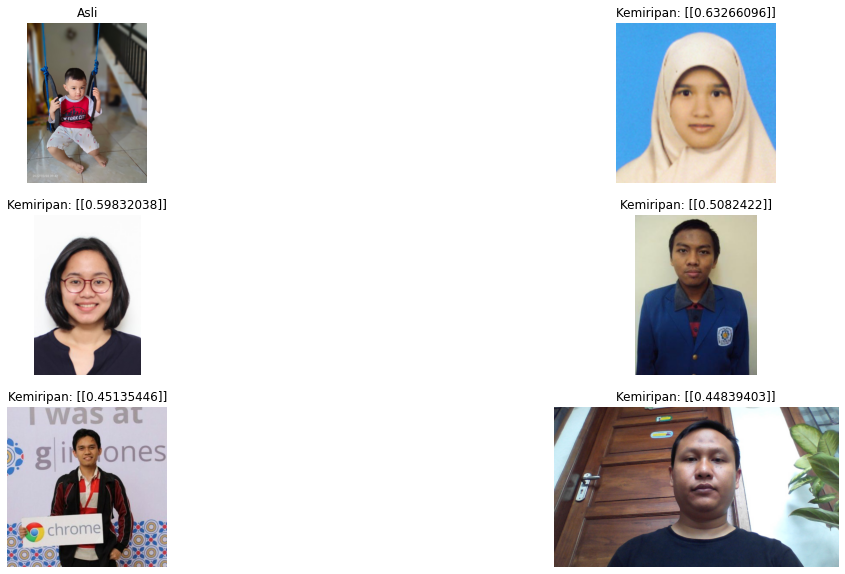

In [ ]:
img_path = 'NonAnggotaKelas/Arkhana 001.jpeg'
img = cv2.imread(img_path)
df = mencocokan_wajah_cosine(img_path)

In [ ]:
df

,Photo,Prediksi
23,AnggotaKelas/Meza Silvana.jpg,[[0.6326609637702697]]
18,AnggotaKelas/Meredita Susanty.jpg,[[0.5983203828358556]]
7,AnggotaKelas/M Khaerul Naim.jpg,[[0.5082421976184587]]
12,AnggotaKelas/Ahmad Luky Ramdani.jpg,[[0.45135446182860206]]
6,AnggotaKelas/Adiyasa Nurfalah.jpg,[[0.44839402681554524]]
13,AnggotaKelas/Yaya Setiyadi.jpg,[[0.4145374129192594]]
0,AnggotaKelas/Varulianto Dear.jpg,[[0.39379417628047075]]
19,AnggotaKelas/Mina Ismu Rahayu.jpg,[[0.38659699830609906]]
14,AnggotaKelas/Leni Fitriani.jpg,[[0.3727193419270748]]
1,AnggotaKelas/Mohamad Idris.jpg,[[0.3684800156627618]]


/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2/UploadFiles


Saving teuku wisnu.jfif to teuku wisnu.jfif
User uploaded file "teuku wisnu.jfif" with length 87700 bytes
/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


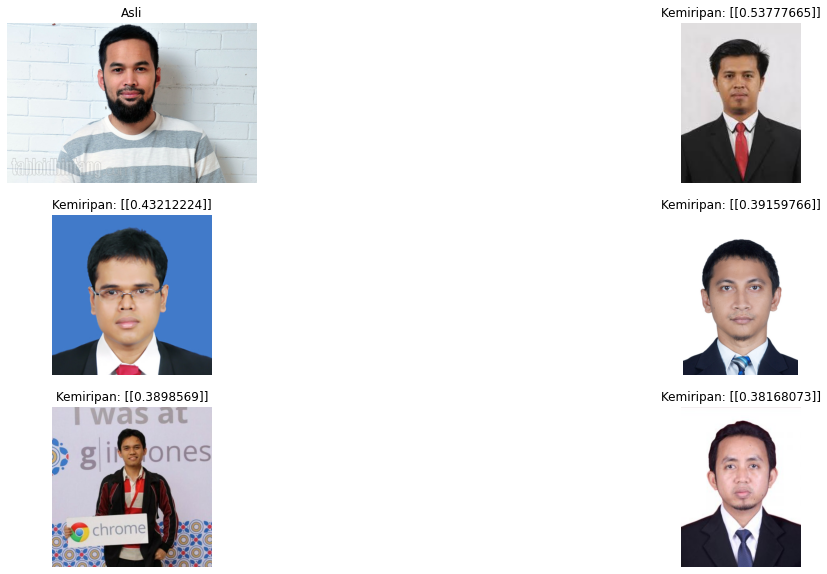

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2/UploadFiles
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2
img_path = "UploadFiles/" + fn
# print(img_path)
df = mencocokan_wajah_cosine(img_path)